<a href="https://colab.research.google.com/github/SamkitShah55/Prasad502/blob/main/License_plate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install keras-ocr
!apt install lib-tesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (1,924 kB/s)
debconf: unable to initi

In [4]:
import cv2,glob,pytesseract,keras_ocr
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

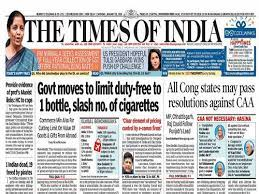

In [6]:
Image("ai.jpg")


In [10]:
text= pytesseract.image_to_string("ai.jpg")
text

' \n\x0c'

In [8]:
import numpy as np
import pandas as pd
import imutils


In [1]:
pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import easyocr

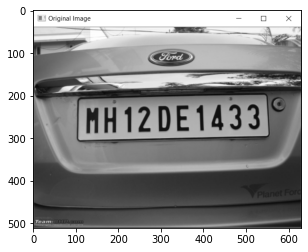

In [5]:
img= cv2.imread("/car.png") # read image
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #apply grey scale
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)) #display image

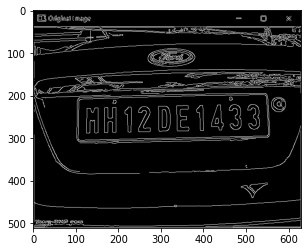

In [6]:
bfilter = cv2.bilateralFilter(img, 11, 17, 17) # noise reduction
edged = cv2.Canny(bfilter, 30, 200) # Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [9]:
""" To detect the License Plate from the Car.
We will use the contour options in opencv to detect for rectangular objects to find the number plate."""
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [10]:
location = None
for contour in contours:
  approx= cv2.approxPolyDP(contour, 10, True)
  if len(approx)==4:
    location=approx
    break

In [11]:
location

array([[[549, 201]],

       [[111, 204]],

       [[102, 301]],

       [[545, 299]]], dtype=int32)

In [12]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

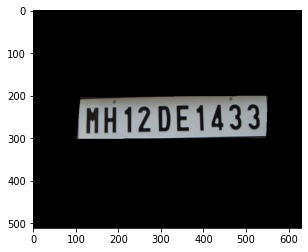

In [13]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [14]:
(x,y) = np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2) = (np.max(x),np.max(y))
cropped_image =gray[x1:x2+1 , y1:y2+1]

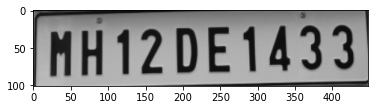

In [15]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [16]:
reader= easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[11, 6], [446, 6], [446, 101], [11, 101]],
  'MHI2 DE1433',
  0.6523046993350049)]

 The License plate Number is MHI2 DE1433


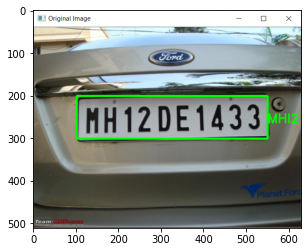

In [17]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text = text , org =(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1,color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]),(0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
print(" The License plate Number is " + text )